In [4]:
from google.colab import files
uploaded_file = files.upload()

Saving twitter_data.csv to twitter_data.csv


In [6]:
import csv
import pandas as pd
df = pd.read_csv('twitter_data.csv')
df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
column_names = ['ID', 'Platform', 'Sentiment', 'Text']
df.columns = column_names
df

,ID,Platform,Sentiment,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


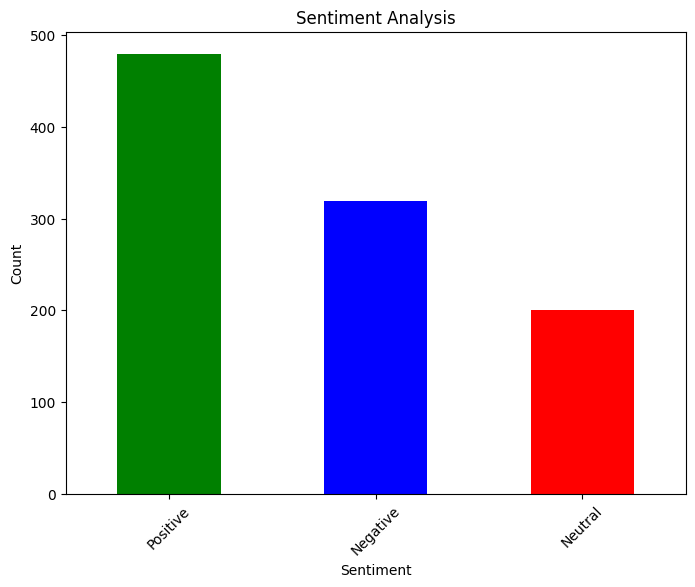

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming 'data' is your DataFrame with columns: 'ID', 'Platform', 'Sentiment', 'Text'
data = df

# Perform sentiment analysis using TextBlob and classify sentiments
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Text'].apply(get_sentiment)

# Count the sentiments
sentiment_counts = data['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

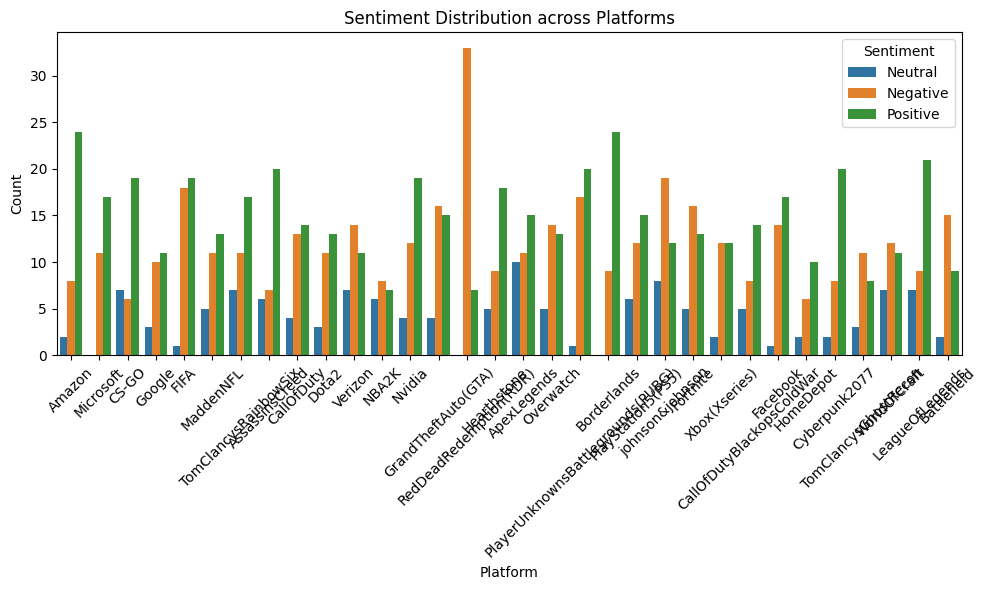

In [17]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Sentiment analysis using NLTK Vader
sid = SentimentIntensityAnalyzer()
df['Sentiment Score'] = df['Text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Map sentiment scores to categories
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Category'] = df['Sentiment Score'].apply(get_sentiment_category)

# Visualize sentiment distribution across platforms
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='Sentiment Category', data=df)
plt.title('Sentiment Distribution across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


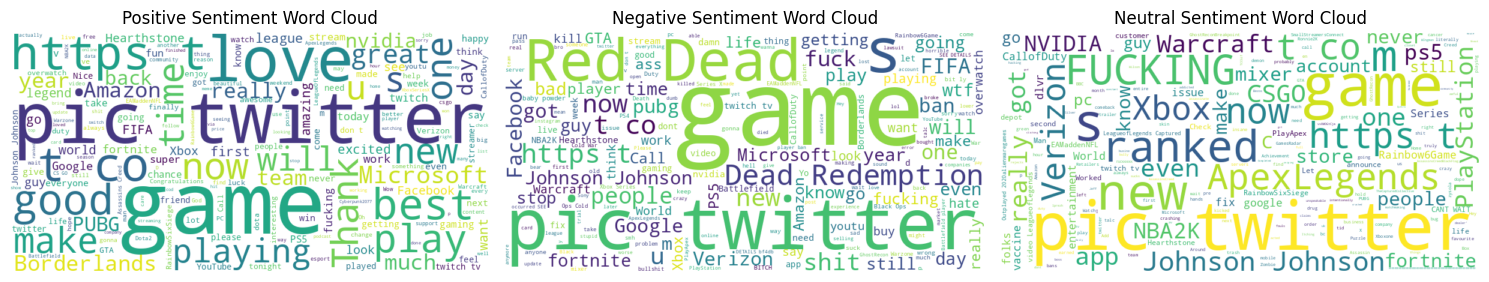

In [20]:
from wordcloud import WordCloud

# Separate text by sentiment category
positive_texts = ' '.join(df[df['Sentiment Category'] == 'Positive']['Text'])
negative_texts = ' '.join(df[df['Sentiment Category'] == 'Negative']['Text'])
neutral_texts = ' '.join(df[df['Sentiment Category'] == 'Neutral']['Text'])

# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)

# Plot word clouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
pip install squarify

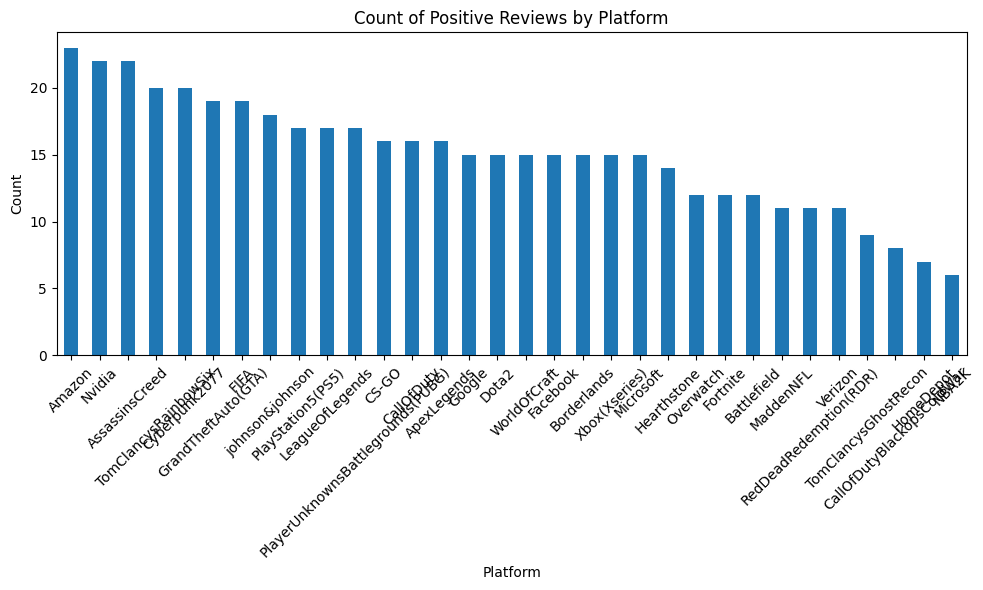

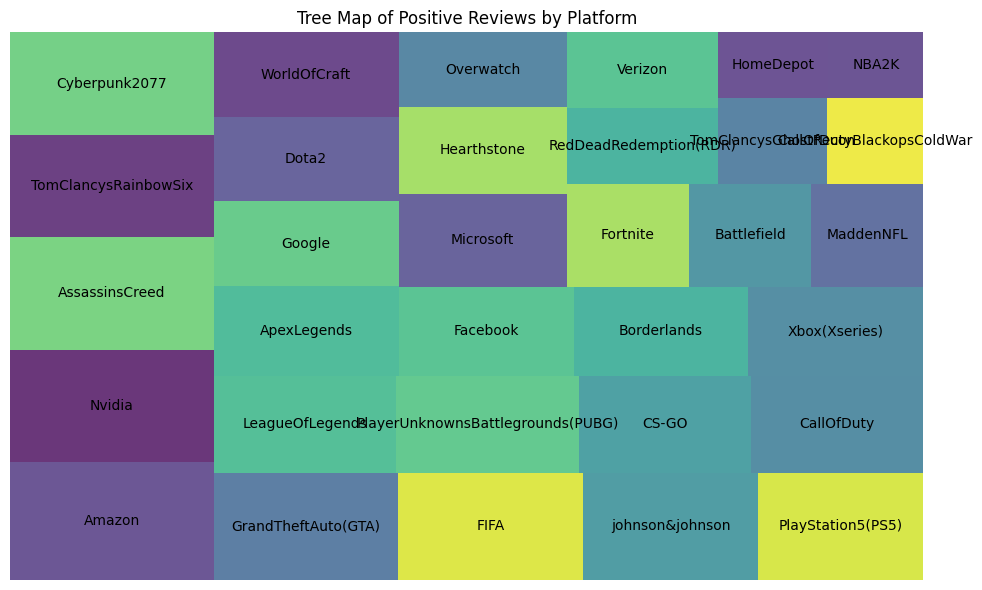

In [33]:
import squarify
# Filter data for positive sentiments only.
positive_df = df[df['Sentiment'] == 'Positive']

# Count positive reviews for each platform.
positive_count_per_platform = positive_df['Platform'].value_counts().sort_values(ascending=False)

# Plotting the bar chart.
plt.figure(figsize=(10, 6))
positive_count_per_platform.plot(kind='bar')
plt.title('Count of Positive Reviews by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

positive_count_per_platform = positive_df['Platform'].value_counts().sort_values(ascending=False)

# Create labels and sizes for treemap
labels = positive_count_per_platform.index
sizes = positive_count_per_platform.values

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Tree Map of Positive Reviews by Platform')
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

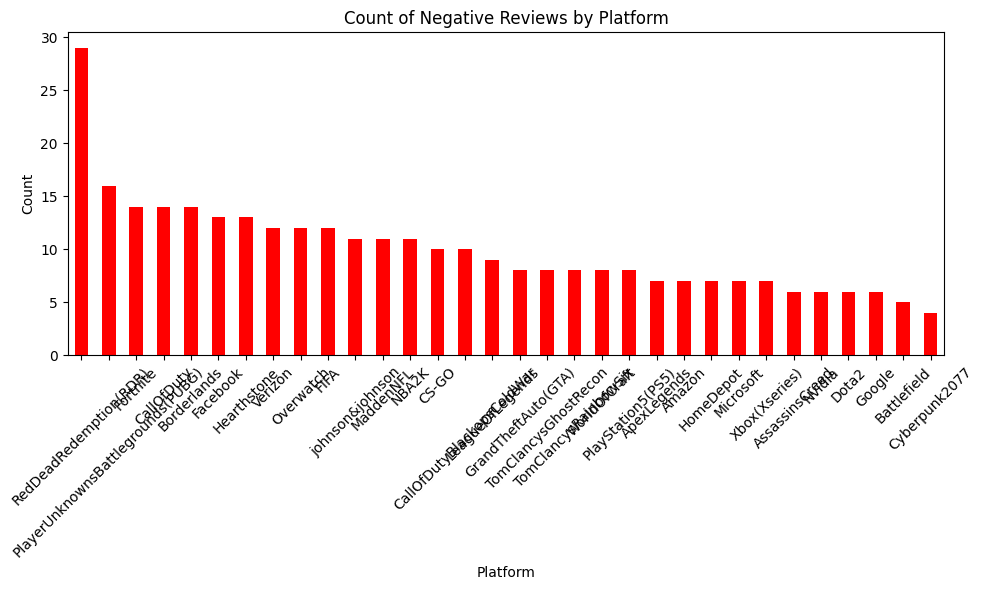

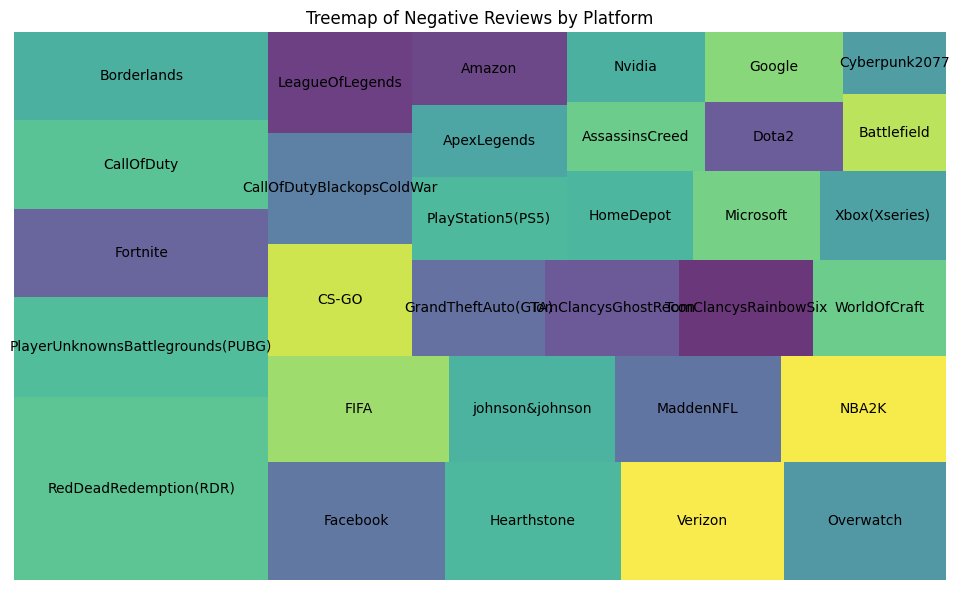

In [32]:

#Filter data for negative comments.
negative_df = df[df['Sentiment'] == 'Negative']

# Count negative reviews for each platform.
negative_count_per_platform = negative_df['Platform'].value_counts().sort_values(ascending=False)

# Plotting the bar chart for negative sentiments.
plt.figure(figsize=(10, 6))
negative_count_per_platform.plot(kind='bar', color='red')
plt.title('Count of Negative Reviews by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the treemap for negative sentiments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=negative_count_per_platform.values, label=negative_count_per_platform.index, alpha=0.8)
plt.title('Treemap of Negative Reviews by Platform')
plt.axis('off')
plt.tight_layout()
plt.show()

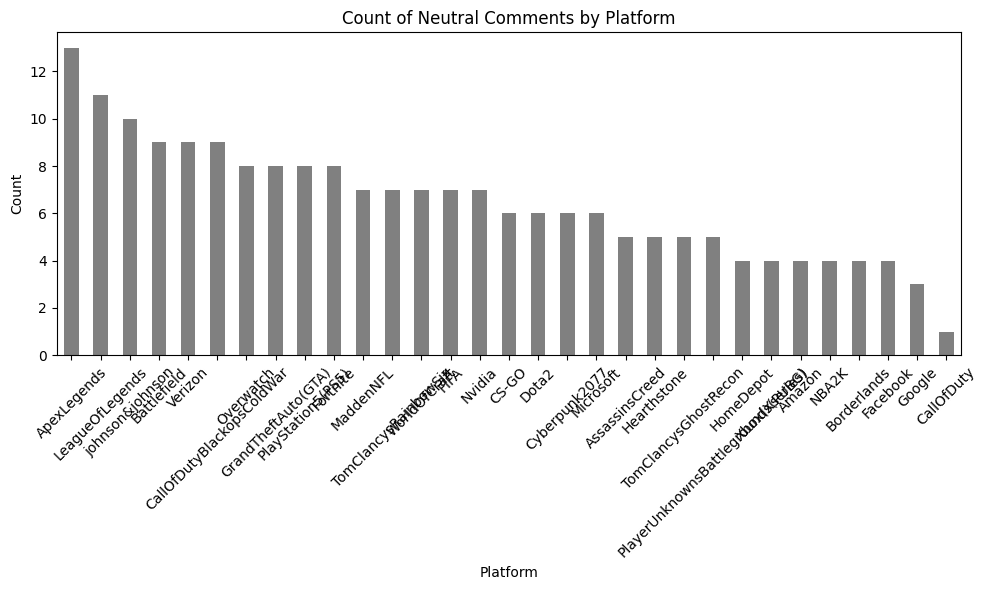

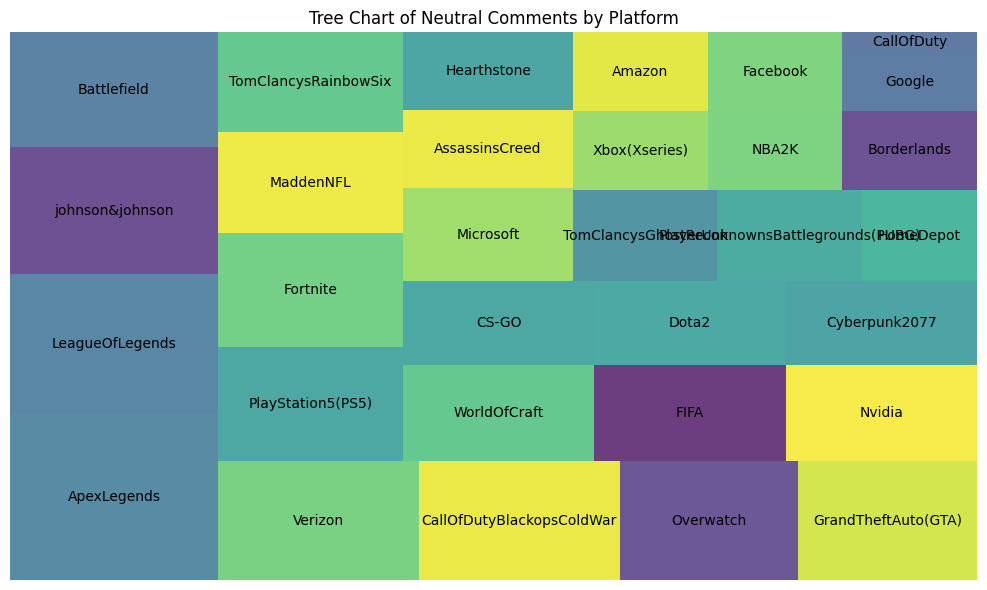

In [36]:
# Filter data for neutral sentiments only
neutral_df = df[df['Sentiment'] == 'Neutral']

# Count neutral comments for each platform
neutral_count_per_platform = neutral_df['Platform'].value_counts().sort_values(ascending=False)

# Plotting the bar chart for neutral sentiments
plt.figure(figsize=(10, 6))
neutral_count_per_platform.plot(kind='bar', color='grey')
plt.title('Count of Neutral Comments by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the treemap for neutral sentiments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=neutral_count_per_platform.values, label=neutral_count_per_platform.index, alpha=0.8)
plt.title('Tree Chart of Neutral Comments by Platform')
plt.axis('off')
plt.tight_layout()
plt.show()

In [42]:
#Count of most used positive sentiments for each platform.

import plotly.express as px
# Count positive sentiments for each platform
positive_count_per_platform = positive_df['Platform'].value_counts().reset_index()
positive_count_per_platform.columns = ['Platform', 'count']

# Plotting the horizontal bar chart for positive sentiments using Plotly Express
fig = px.bar(positive_count_per_platform, x='count', y='Platform',
             title='Count of Positive Sentiments per Platform',
             orientation='h', width=700, height=700, color='Platform')

fig.show()

In [46]:
#Count of most used neutral sentiments for each platform.


# Count neutral sentiments for each platform
neutral_count_per_platform = neutral_df['Platform'].value_counts().reset_index()
neutral_count_per_platform.columns = ['Platform', 'count']

# Plotting the horizontal bar chart for neutral sentiments using Plotly Express
fig = px.bar(neutral_count_per_platform, x='count', y='Platform',
             title='Count of Neutral Sentiments per Platform',
             orientation='h', width=700, height=700, color='Platform')

fig.show()

In [45]:
#Count of most used negative sentiments for each platform.

# Count negative sentiments for each platform
negative_count_per_platform = negative_df['Platform'].value_counts().reset_index()
negative_count_per_platform.columns = ['Platform', 'count']

# Plotting the horizontal bar chart for negative sentiments using Plotly Express
fig = px.bar(negative_count_per_platform, x='count', y='Platform',
             title='Count of Negative Sentiments per Platform',
             orientation='h', width=700, height=700, color='Platform')

fig.show()

In [49]:
from collections import Counter
# Get the most common words in positive sentiments
top_positive = Counter([word for sentence in positive_df['Text'] for word in sentence.split()])
top_positive = pd.DataFrame(top_positive.most_common(20))
top_positive = top_positive.iloc[1:, :]
top_positive.columns = ['Common_words', 'count']

top_positive.style.background_gradient(cmap='Greens')

,Common_words,count
1,to,235
2,and,225
3,a,198
4,I,167
5,of,163
6,for,140
7,is,135
8,in,103
9,on,95
10,this,89


In [52]:
# Get the most common words in neutral sentiments
top_neutral = Counter([word for sentence in neutral_df['Text'] for word in sentence.split()])
top_neutral = pd.DataFrame(top_neutral.most_common(20))
top_neutral = top_neutral.iloc[1:, :]
top_neutral.columns = ['Common_words', 'count']

top_neutral.style.background_gradient(cmap='Purples')

,Common_words,count
1,to,45
2,I,42
3,is,37
4,and,30
5,a,28
6,this,27
7,of,27
8,for,23
9,in,23
10,my,20


In [51]:
# Get the most common words in negative sentiments
top_negative = Counter([word for sentence in negative_df['Text'] for word in sentence.split()])
top_negative = pd.DataFrame(top_negative.most_common(20))
top_negative = top_negative.iloc[1:, :]
top_negative.columns = ['Common_words', 'count']

top_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,a,135
2,to,127
3,and,116
4,I,110
5,is,97
6,of,92
7,in,73
8,for,61
9,my,61
10,you,61
